In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical


In [2]:
dataset_train = pd.read_csv('Dataset/google_stock_price/Google_Stock_Price_Train.csv') # change the path
training_set = dataset_train.iloc[:, 1:2].values


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
num_classes = X_train.shape[1]
y_train = to_categorical(y_train, num_classes)

In [7]:
from keras.layers import SimpleRNN, Dense
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(num_classes, activation='softmax'))

c:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
def build_model(x_train, y_train, optimizer, model):
    print("Optimizer: ", optimizer)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics = ['accuracy'])
    history = model.fit(x_train, y_train, batch_size=128, epochs=20)
    return model, history

In [9]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad
adam_model, adam_rnn_history = build_model(X_train, y_train, Adam(), model)
rmsprop_model, rmsprop_rnn_history = build_model(X_train, y_train, RMSprop(), model)
adagrad_model, adagrad_rnn_history = build_model(X_train, y_train, 
                                                     Adagrad(), model)
sgd_model, sgd_rnn_history = build_model(X_train, y_train, 
                                             SGD(), model)

Optimizer:  <keras.src.optimizers.adam.Adam object at 0x0000017520517020>
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.0000e+00 - loss: 3.9862
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4262 - loss: 3.2400
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9997 - loss: 2.4721
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9995 - loss: 1.6923
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9996 - loss: 1.0198
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9989 - loss: 0.5748
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9978 - loss: 0.3342
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9997 - loss: 0.2005
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9985 - loss: 0.1437
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9997 - loss: 0.1018
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9991 

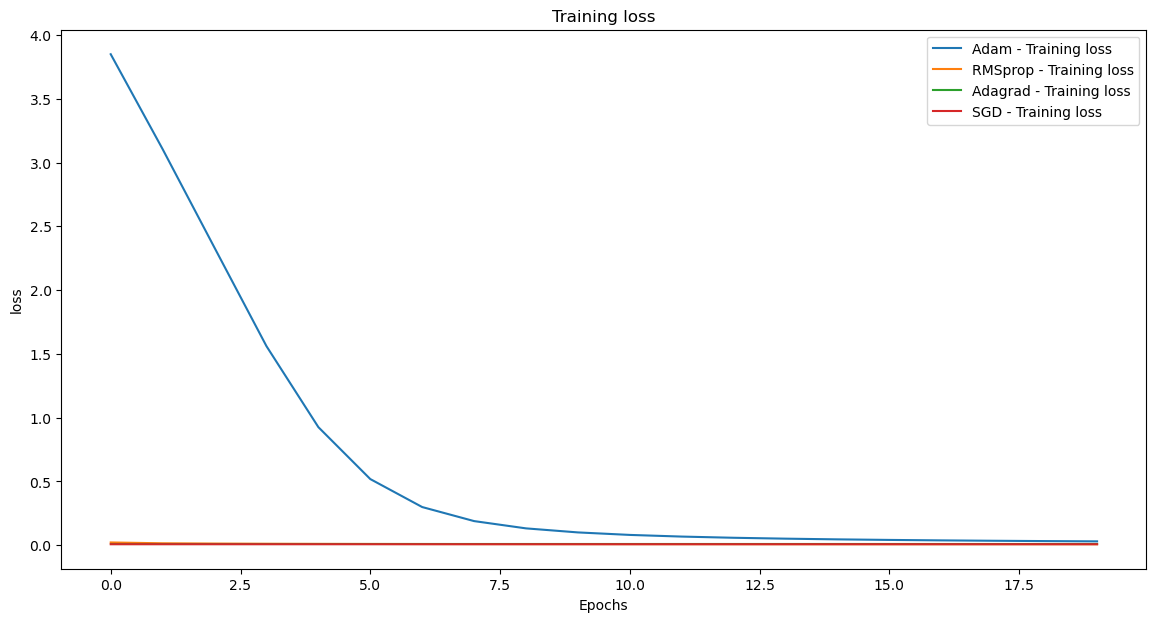

In [10]:
# Function to plot training loss
def plot_loss(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['loss'], label=f'{name} - Training loss')
    
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

# Plot the results
histories = [adam_rnn_history, rmsprop_rnn_history, adagrad_rnn_history, sgd_rnn_history]
plot_loss(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])


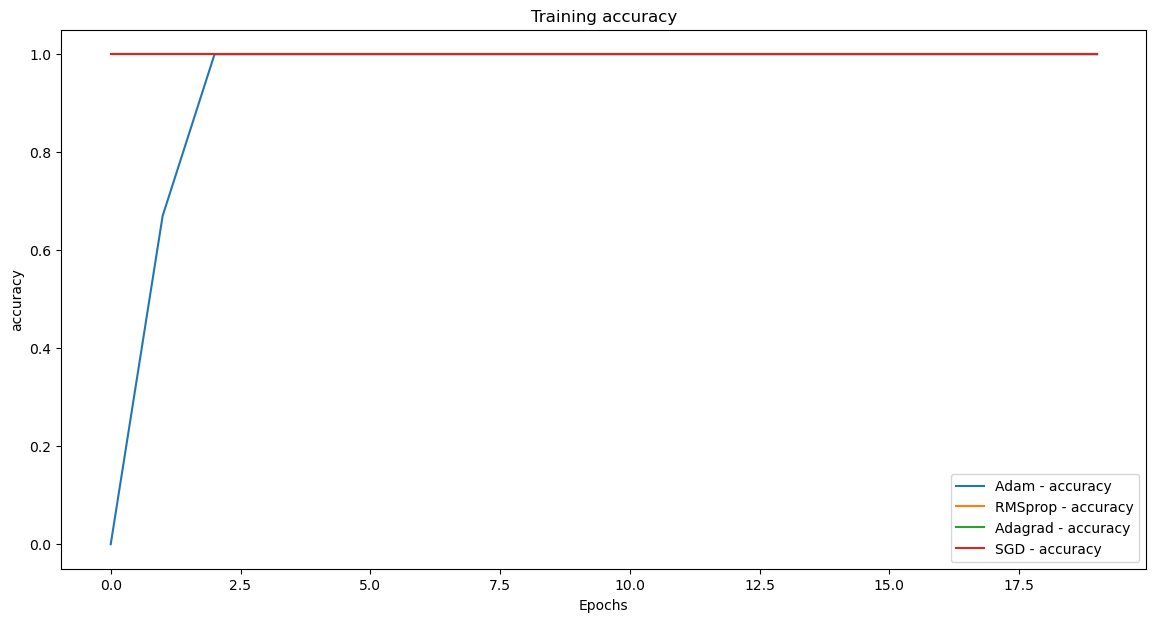

In [11]:
# Function to plot training loss
def plot_accuracy(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['accuracy'], label=f'{name} - accuracy')
    
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

# Plot the results
histories = [adam_rnn_history, rmsprop_rnn_history, adagrad_rnn_history, sgd_rnn_history]
plot_accuracy(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])
